In [1]:
import networkx as nx
import matplotlib.pyplot as plt

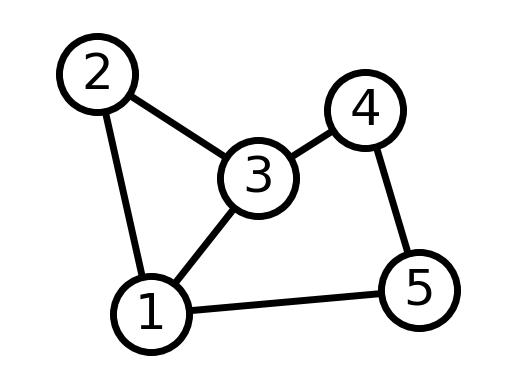

In [13]:

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


# A* and Dijkstra

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [28]:

# Step 1: Create a Graph with 10 nodes and random edges and weights
G = nx.Graph()
edges = [
    ('A', 'C', 9), ('A', 'D', 7), ('A', 'E', 13), ('A', 'F', 20),
    ('C', 'H', 6),
    ('D', 'H', 8), ('D', 'E', 4),
    ('E', 'K', 4), ('E', 'I', 3),
    ('F', 'G', 4), ('F', 'I', 6),
    ('H', 'K', 5), 
    ('K', 'B', 6), ('K', 'I', 9),
    ('I', 'B', 5)
]

# Add nodes and edges to the graph
G.add_weighted_edges_from(edges)

# Step 2: Define Dijkstra's Algorithm
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    visited = set()
    pq = PriorityQueue()
    pq.put((0, start))
    predecessors = {start: None}

    while not pq.empty():
        current_distance, current_node = pq.get()
        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                pq.put((distance, neighbor))

    # Reconstruct path from start to end
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path = path[::-1]  # Reverse path

    return path, distances[end]

# Step 3: Define A* Algorithm with Euclidean distance heuristic
def euclidean_distance(graph, node1, node2):
    pos = nx.spring_layout(graph)
    (x1, y1) = pos[node1]
    (x2, y2) = pos[node2]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def a_star(graph, start, end):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {start: None}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = euclidean_distance(graph, start, end)

    while not open_set.empty():
        _, current = open_set.get()

        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], g_score[end]

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(graph, neighbor, end)
                open_set.put((f_score[neighbor], neighbor))

    return None, float('inf')  # If no path exists



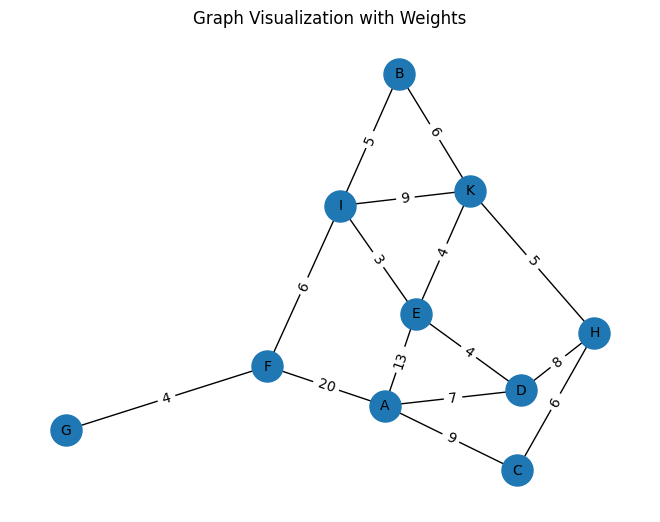

Dijkstra's Algorithm:
Path: ['A', 'D', 'E', 'I', 'B']
Distance: 19

A* Algorithm:
Path: ['A', 'D', 'E', 'I', 'B']
Distance: 19


In [52]:
# Step 4: Visualize the Graph
pos = nx.spring_layout(G, seed=24)  # Layout for consistent positioning
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})

plt.title("Graph Visualization with Weights")
plt.grid(True) 
plt.show()
# Step 5: Test Dijkstra and A* algorithms
start, end = 'A', 'B'  # Set the start and end nodes
print("Dijkstra's Algorithm:")
dijkstra_path, dijkstra_distance = dijkstra(G, start, end)
print("Path:", dijkstra_path)
print("Distance:", dijkstra_distance)

print("\nA* Algorithm:")
a_star_path, a_star_distance = a_star(G, start, end)
print("Path:", a_star_path)
print("Distance:", a_star_distance)


# Predefined heuristic

In [61]:

# Step 1: Create a Graph with 10 nodes and random edges and weights
G = nx.Graph()
edges = [
    ('A', 'C', 9), ('A', 'D', 7), ('A', 'E', 13), ('A', 'F', 20),
    ('C', 'H', 6),
    ('D', 'H', 8), ('D', 'E', 4),
    ('E', 'K', 4), ('E', 'I', 3),
    ('F', 'G', 4), ('F', 'I', 6),
    ('H', 'K', 5), 
    ('K', 'B', 6), ('K', 'I', 9),
    ('I', 'B', 5)
]

# Add nodes and edges to the graph
G.add_weighted_edges_from(edges)

heuristics = {
    'A': 14, 'B': 0, 'C': 15, 'D': 6,
    'E': 8, 'F': 7, 'G': 12, 'H': 10,
    'I': 4, 'K':2 
}

# Step 2: Define Dijkstra's Algorithm
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    visited = set()
    pq = PriorityQueue()
    pq.put((0, start))
    predecessors = {start: None}

    while not pq.empty():
        current_distance, current_node = pq.get()
        if current_node in visited:
            continue

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                pq.put((distance, neighbor))

    # Reconstruct path from start to end
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path = path[::-1]  # Reverse path

    return path, distances[end]

# Step 3: Define A* Algorithm with fixed heuristic
def a_star(graph, start, end):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {start: None}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristics[start]

    while not open_set.empty():
        _, current = open_set.get()

        if current == end:
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], g_score[end]

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristics[neighbor]
                open_set.put((f_score[neighbor], neighbor))

    return None, float('inf')



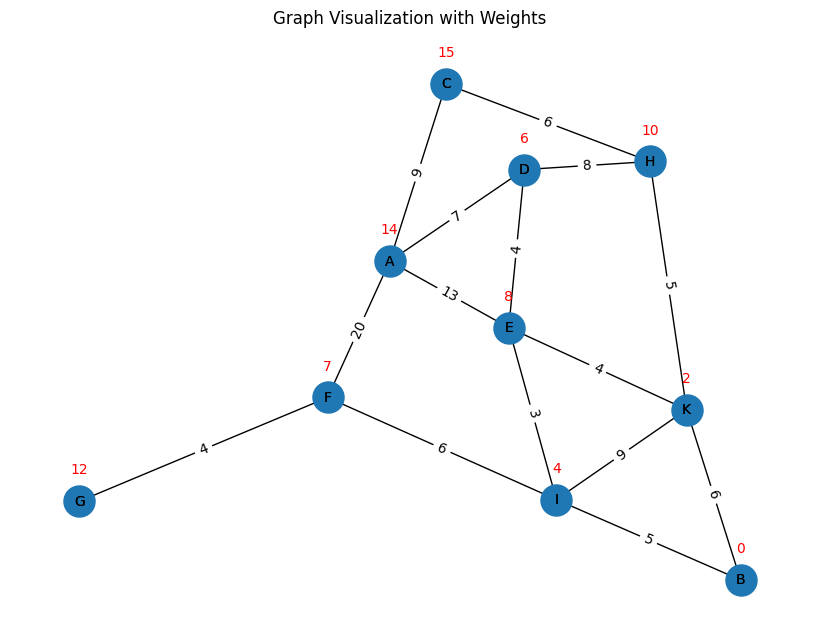

Dijkstra's Algorithm:
Path: ['A', 'D', 'E', 'I', 'B']
Distance: 19

A* Algorithm:
Path: ['A', 'D', 'E', 'I', 'B']
Distance: 19


In [70]:
# Step 4: Visualize the Graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})

# Draw node labels (node names) in default position
nx.draw_networkx_labels(G, pos, font_color='black', font_size=10)

# Add heuristic values slightly above the nodes
heuristic_labels = {node: f"{heuristics[node]}" for node in G.nodes}
pos_adjusted = {node: (pos[node][0], pos[node][1] + 0.08) for node in G.nodes}  # Adjusted position
nx.draw_networkx_labels(G, pos_adjusted, labels=heuristic_labels, font_color='red', font_size=10)


plt.title("Graph Visualization with Weights")
plt.grid(True) 
plt.show()
# Step 5: Test Dijkstra and A* algorithms
start, end = 'A', 'B'  # Set the start and end nodes
print("Dijkstra's Algorithm:")
dijkstra_path, dijkstra_distance = dijkstra(G, start, end)
print("Path:", dijkstra_path)
print("Distance:", dijkstra_distance)

print("\nA* Algorithm:")
a_star_path, a_star_distance = a_star(G, start, end)
print("Path:", a_star_path)
print("Distance:", a_star_distance)
